In [1]:
from sympy import *
from IPython.display import display, Math
init_printing()

k = symbols('k', real=True, positive=True)
T = symbols('T', real=True, positive=True)
vGP = symbols('v_{G\,P}')
xP = symbols('x_P')
vA = symbols('v_A')
vW = symbols('v_W')
kapP = symbols('\\kappa_P')
lP = symbols('\\lambda_P')

d_etadot_d_eta = -k - pi/T
d_etadot_d_beta = vGP / vA / cos(xP) * pi / T - vGP**2 * kapP * tan(xP) / vA / cos(xP)
d_betadot_d_eta = -pi / T * vA * cos(xP) / vGP
d_betadot_d_beta = pi / T - vGP * kapP * tan(xP)

display(Math('\cfrac{\\partial \\dot{\\eta}}{\\partial \\eta} = %s' %latex(d_etadot_d_eta)))
display(Math('\\cfrac{\\partial \\dot{\\eta}}{\\partial \\beta} = %s' %latex(d_etadot_d_beta)))
display(Math('\\cfrac{\\partial \\dot{\\beta}}{\\partial \\eta} = %s' %latex(d_betadot_d_eta)))
display(Math('\\cfrac{\\partial \\dot{\\beta}}{\\partial \\beta} = %s' %latex(d_betadot_d_beta)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
omW = symbols('\\omega_W')
omW_expr = vGP * kapP * tan(xP)

a = symbols('a')
a_expr = vGP / vA / cos(xP)

display(Math('%s = %s' %(latex(omW), latex(omW_expr))))
display(Math('%s = %s' %(latex(a), latex(a_expr))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

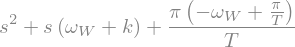

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# second order dynamical system WRONGGG!!
s = symbols('s')
sod_b = (k + omW)
sod_c = pi/T * (pi/T - omW)
second_order_dynamics = s**2 + sod_b * s + sod_c
display(second_order_dynamics)

# natural frequency
omn = symbols('\\omega_n')
omn_expr = sqrt(sod_c)
display(Math('%s = %s' %(latex(omn), latex(omn_expr))))

# damping ratio
zeta = symbols('\\zeta')
zeta_expr = simplify(sod_b / 2 / omn_expr)
display(Math('%s = %s' %(latex(zeta), latex(zeta_expr))))

In [4]:
# nominal gains (zero wind case)

om0 = symbols('\\omega_0', positive = True, real = True)
zeta0 = symbols('\\zeta_0', positive = True, real = True)

k0 = symbols('k_0', positive = True, real = True)
k0_expr = 2 * zeta0 * om0
display(Math('%s = %s' %(latex(k0),latex(k0_expr))))

T0 = symbols('T_0', positive = True, real = True)
T0_expr = pi / om0
display(Math('%s = %s' %(latex(T0),latex(T0_expr))))

# plug in and confirm it works when wind freq = 0
display(Math('%s(%s=%s,%s=%s,%s=0) = %s = %s' %(latex(omn),latex(k),latex(k0), \
                                                latex(T),latex(T0),latex(omW), \
                                                latex(omn_expr.subs({omW:0, k:k0, T:T0})), \
                                                latex(omn_expr.subs({omW:0, k:k0_expr, T:T0_expr})))))
display(Math('%s(%s=%s,%s=%s,%s=0) = %s = %s' %(latex(zeta),latex(k),latex(k0), \
                                                latex(T),latex(T0),latex(omW), \
                                                latex(zeta_expr.subs({omW:0, k:k0, T:T0})), \
                                                latex(zeta_expr.subs({omW:0, k:k0_expr, T:T0_expr})))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [114]:
display(Math('%s = %s' %(latex(omn),latex(omn_expr.subs({k:k0_expr, T:T0_expr})))))
display(Math('%s = %s' %(latex(zeta),latex(zeta_expr.subs({k:k0_expr, T:T0_expr})))))

P = symbols('P')
P0 = symbols('P_0', real=True, positive=True)
P_expr = 2*pi/omn_expr.subs({k:k0_expr,T:T0_expr})
P_expr = simplify(P_expr.subs(om0, 2*pi/P0))
# display(Math('%s = %s' %(latex(P),latex(P_expr))))

zeta_sub_expr = simplify(zeta_expr.subs({k:k0_expr,T:T0_expr}))
zeta_sub_expr = simplify(zeta_sub_expr.subs(om0, 2*pi/P0))
# display(Math('%s = %s' %(latex(zeta),latex(zeta_sub_expr))))

# eig_p_expr = omn * (-zeta + I * sqrt(1 - zeta**2))
# eig_n_expr = omn * (-zeta - I * sqrt(1 - zeta**2))

# display(Math('s_1 = %s' %latex(eig_p_expr)))
# display(Math('s_2 = %s' %latex(eig_n_expr)))


# s1_simp = simplify(eig_p_expr.subs({omn:omn_expr.subs({k:k0_expr, T:T0_expr}),zeta:zeta_expr.subs({k:k0_expr, T:T0_expr})}))
# s1_simp = simplify(s1_simp.subs(om0,2*pi/P0))
# s2_simp = simplify(eig_n_expr.subs({omn:omn_expr.subs({k:k0_expr, T:T0_expr}),zeta:zeta_expr.subs({k:k0_expr, T:T0_expr})}))
# s2_simp = simplify(s2_simp.subs(om0,2*pi/P0))

# display(Math('s_1 = %s' %latex(s1_simp)))
# display(Math('s_2 = %s' %latex(s2_simp)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [112]:
alpW = symbols('\\alpha_W')

fW = symbols('f_W')
fW_expr = alpA**2 * sin(lP) * cos(lP) / sqrt(1 - alpW**2 * sin(lP)**2) + alpW * sin(lP)
display(Math('%s = %s' %(latex(fW),latex(fW_expr))))

omW_expr = vA * kapP * fW
display(Math('%s = %s = %s' %(latex(omW),latex(omW_expr),latex(omW_expr.subs(fW,fW_expr)))))

# P_expr_sub = P_expr.subs(omW, omW_expr)
# display(Math('%s = %s' %(latex(P),latex(P_expr_sub))))

display(Math('%s = %s' %(latex(P),latex(P_expr))))

display(Math('%s = %s' %(latex(zeta),latex(zeta_sub_expr))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [138]:
import numpy as np

len_lP = 201
len_alpW = 11

lP_data = np.linspace(-np.pi,np.pi,len_lP)
alpW_data = np.linspace(0,1,len_alpW)

fW_data = np.zeros([len_alpW, len_lP])
omW_data = np.zeros([len_alpW, len_lP])
P_data = np.zeros([len_alpW, len_lP])
zeta_data = np.zeros([len_alpW, len_lP])

vA1 = 10
kapP1 = 1/50
P1 = 10
zeta1 = 0.7071

fW_eval = lambdify((lP, alpW), fW_expr, 'numpy')
omW_eval = lambdify((vA, kapP, fW), omW_expr, 'numpy')
P_eval = lambdify((omW, P0), P_expr, 'numpy')
zeta_eval = lambdify((omW, P0, zeta0), zeta_sub_expr, 'numpy')

eps_pi_2 = 0.0001
for i in range(len_alpW):
    if alpW_data[i] == 1:
        idx_sel_geq_pi_2 = lP_data >= np.pi/2 - eps_pi_2
        fW_data[i, idx_sel_geq_pi_2] = np.nan
        
        idx_sel_leq_m_pi_2 = lP_data <= -np.pi/2 + eps_pi_2
        fW_data[i, idx_sel_leq_m_pi_2] = np.nan
        
        idx_sel = np.all([~idx_sel_geq_pi_2, ~idx_sel_leq_m_pi_2],axis=0)
        fW_data[i, idx_sel] = fW_eval(lP_data[idx_sel], alpW_data[i])
    else:
        fW_data[i,:] = fW_eval(lP_data, alpW_data[i])
        
    omW_data[i,:] = omW_eval(vA1, kapP1, fW_data[i,:])
    P_data[i,:] = P_eval(omW_data[i,:], P1)
    zeta_data[i, :] = zeta_eval(omW_data[i,:], P1, zeta1)
    
# print(P_data[-1,:])
# print(fW_data[-1,:])

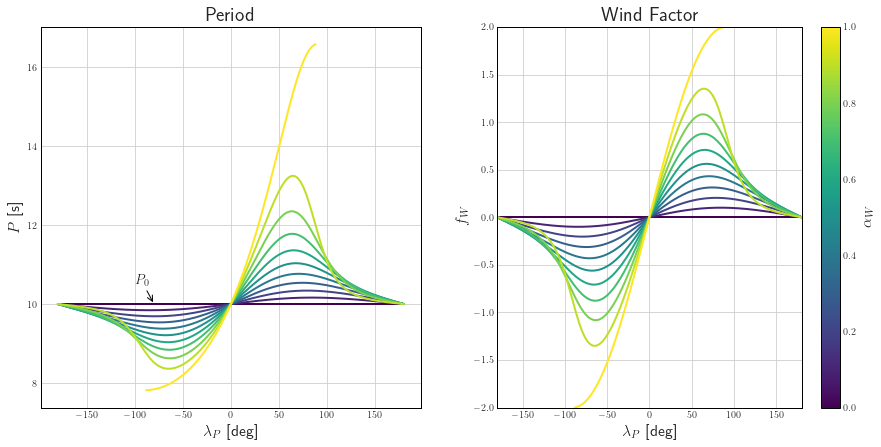

In [139]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({"text.usetex": True})
plt.rcParams.update({'legend.frameon': True,
                     'legend.framealpha': 1,
                     'legend.facecolor': 'white',
                     'axes.titlesize': 20,
                     'axes.labelsize': 16,
                     'legend.fontsize': 14,
                     'axes.edgecolor': 'black'})
plot_lw = 2
cmap = plt.cm.get_cmap('viridis', len_alpW)

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_title(r'Period')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$P$ [s]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), P_data[i,:], linewidth=plot_lw, color=cmap(i))
ax1.annotate(r'$P_0$', xy=(-80, P1), xytext=(-100, P1+0.5), arrowprops=dict(arrowstyle="->"), fontsize=14)

ax2.set_title(r'Wind Factor')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$f_W$')
for i in range(len_alpW):
    ax2.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmap(i))
ax2.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
ax2.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()

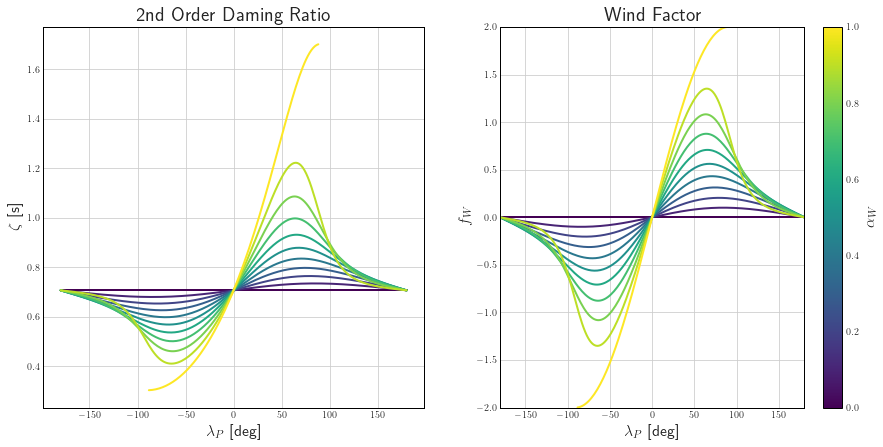

In [124]:
fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_title(r'Daming Ratio')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$\zeta$ [s]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), zeta_data[i,:], linewidth=plot_lw, color=cmap(i))

ax2.set_title(r'Wind Factor')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$f_W$')
for i in range(len_alpW):
    ax2.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmap(i))
ax2.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
ax2.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()

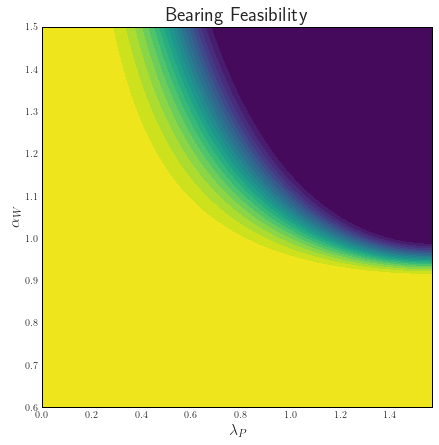

In [218]:
# excess wind case

def bearingfeas(sinlP, coslP, wind_ratio):
    
    SIN_LAMBDA_CO = 0.0349
    COS_LAMBDA_CO = 0.999
    ONE_OVER_S_LAMBDA_CO = 1 / SIN_LAMBDA_CO
    WIND_RATIO_BUF = 0.1
    M_CO = COS_LAMBDA_CO / (SIN_LAMBDA_CO*SIN_LAMBDA_CO)
    
    sin_lambda = np.abs(sinlP)
    if wind_ratio * coslP <= 0.0:
        sin_lambda = 1

    # upper and lower feasibility barriers
    wind_ratio_ub = 0
    wind_ratio_lb = 0
    if sin_lambda < SIN_LAMBDA_CO: 
        # linear finite cut-off
        mx = M_CO * (SIN_LAMBDA_CO - sin_lambda)
        wind_ratio_ub_co = ONE_OVER_S_LAMBDA_CO
        wind_ratio_ub = wind_ratio_ub_co + mx
        wind_ratio_lb_co = (ONE_OVER_S_LAMBDA_CO - 2.0) * WIND_RATIO_BUF + 1.0
        wind_ratio_lb = wind_ratio_lb_co + WIND_RATIO_BUF * mx
    else:
        one_over_s_lambda = 1.0 / sin_lambda
        wind_ratio_ub = one_over_s_lambda
        wind_ratio_lb = (one_over_s_lambda - 2.0) * WIND_RATIO_BUF + 1.0

    # calculate bearing feasibility
    feas = 1.0
    if wind_ratio > wind_ratio_ub:
        # infeasible
        feas = 0.0
    elif wind_ratio > wind_ratio_lb:
        # partially feasible
        # smoothly transition from fully feasible to infeasible
        feas = np.cos(np.pi/2 * np.clip((wind_ratio - wind_ratio_lb) / (wind_ratio_ub - wind_ratio_lb), 0.0, 1.0))
        feas = feas * feas

    return feas

len_wr = 201
len_lP_ex = 201
wr_excess_data = np.linspace(0.6, 1.5, len_wr)
lP_excess_data = np.linspace(0, np.pi/2, len_lP_ex)
sinlP = np.sin(lP_excess_data)
coslP = np.cos(lP_excess_data)

feas_data = np.zeros([len_wr,len_lP_ex])
for i in range(len_wr):
    for j in range(len_lP_ex):
        feas_data[i,j] = bearingfeas(sinlP[j], coslP[j], wr_excess_data[i])

fig, ax = plt.subplots(figsize=(7,7))

# xx, yy = np.meshgrid(sinlP, wr_excess_data)
xx, yy = np.meshgrid(lP_excess_data, wr_excess_data)

ax.contourf(xx, yy, feas_data, 21, cmap=plt.cm.viridis)
ax.set_title(r'Bearing Feasibility')
# plt.xlabel(r'$\sin\lambda_P$')
ax.set_xlabel(r'$\lambda_P$')
ax.set_ylabel(r'$\alpha_W$')
# plt.xlim([sinlP[0], sinlP[-1]])
ax.set_xlim([lP_excess_data[0], lP_excess_data[-1]])



In [241]:
sigf = symbols('\\sigma_f', positive=True, real=True)
a = symbols('a')
s = symbols('s')

omP = vGP * kapP
a11 = -k - pi/T + (1 - sigf) * omW
a12 = a * ( (pi/T - omW) - (1 - sigf) * (omP**2 * T/pi - omW * (a - 2)) )
a21 = -1/a * pi/T
a22 = pi/T - sigf * omW

char_eq_f = (s - a11) * (s - a22) - (-a21) * (-a12)
char_eq_f = Poly(char_eq_f, s)
char_eq_f_coeffs = char_eq_f.coeffs()

display(Math('%s' %latex(char_eq_f_coeffs[0])))
display(Math('%s' %latex(simplify(char_eq_f_coeffs[1]))))
display(Math('%s' %latex(simplify(char_eq_f_coeffs[2]))))

char_eq_f = Poly(char_eq_f.subs(sigf, 1), s)
char_eq_f_coeffs = char_eq_f.coeffs()

display(Math('%s' %latex(char_eq_f_coeffs[0])))
display(Math('%s' %latex(simplify(char_eq_f_coeffs[1]))))
display(Math('%s' %latex(simplify(char_eq_f_coeffs[2]))))

# omn_f_expr = 1
# display(Math('%s = %s' %(latex(omn),latex(omn_f_expr))))

# P_f_expr = simplify(2*pi/omn_f_expr)
# display(Math('%s = %s' %(latex(P),latex(P_f_expr))))


P_f_expr = 2*pi/sqrt(simplify(char_eq_f_coeffs[2]))
P_f_expr = simplify(P_f_expr.subs({k:k0_expr,T:T0_expr}))
P_f_eval = lambdify((P0,zeta0,sigf,kapP,vGP,omW,a), P_f_expr, 'numpy')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [176]:
len_alpW_excess = 11

alpW_excess_data = np.linspace(1,2,len_alpW_excess)

fW_excess_data = np.empty((len_alpW_excess, len_lP))
fW_excess_data[:] = np.NaN
omW_excess_data = np.empty((len_alpW_excess, len_lP))
omW_excess_data[:] = np.NaN
P_excess_data = np.empty((len_alpW_excess, len_lP))
P_excess_data[:] = np.NaN
zeta_excess_data = np.empty((len_alpW_excess, len_lP))
zeta_excess_data[:] = np.NaN

for i in range(len_alpW_excess):
    feas_cond = np.abs(lP_data) < np.arcsin(1 / alpW_excess_data[i])
    
    fW_excess_data[i, feas] = fW_eval(lP_data[feas_cond], alpW_excess_data[i])
    omW_excess_data[i, feas] = omW_f_eval(vA1, kapP1, fW_excess_data[i, feas_cond])
    P_excess_data[i, feas] = P_f_eval(omW_excess_data[i, feas_cond], P1)
    zeta_excess_data[i, feas] = zeta_f_eval(omW_excess_data[i, feas_cond], P1, zeta1)

<lambdifygenerated-148>:2: RuntimeWarning: invalid value encountered in sqrt
  return (sqrt(2)*sqrt(pi)*P_0/sqrt(-Dummy_225*P_0 + 2*pi))
<lambdifygenerated-149>:2: RuntimeWarning: invalid value encountered in sqrt
  return (sqrt(2)*(pi*Dummy_226 + (1/4)*Dummy_227*P_0)/(sqrt(pi)*sqrt(-Dummy_227*P_0 + 2*pi)))


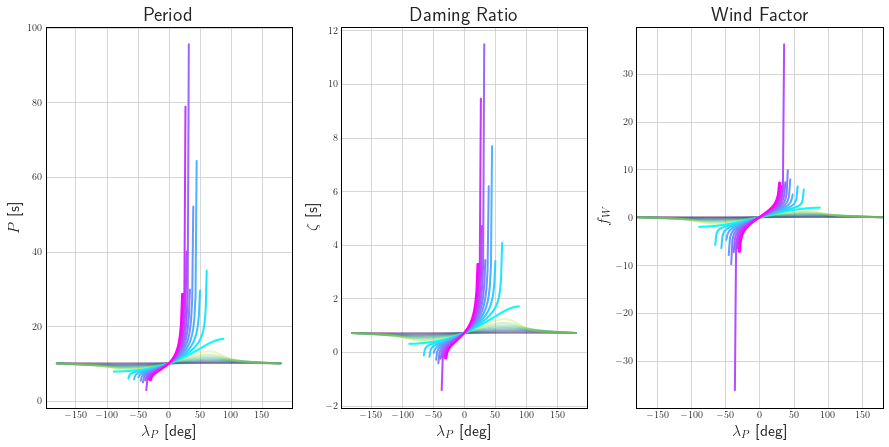

In [177]:
cmap_excess = plt.cm.get_cmap('cool', len_alpW_excess)

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])
ax3 = fig.add_subplot(spec[:, 2])

ax1.set_title(r'Period')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$P$ [s]')

# lower wind case
for i in range(len_alpW):
    cmapi = cmap(i)[:-1] + (0.3,)
    ax1.plot(np.rad2deg(lP_data), P_data[i,:], linewidth=plot_lw, color=cmapi)
    
# excess wind case 
for i in range(len_alpW_excess):
    ax1.plot(np.rad2deg(lP_data), P_excess_data[i,:], linewidth=plot_lw, color=cmap_excess(i))

ax2.set_title(r'Daming Ratio')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$\zeta$ [s]')

# lower wind case
for i in range(len_alpW):
    cmapi = cmap(i)[:-1] + (0.3,)
    ax2.plot(np.rad2deg(lP_data), zeta_data[i,:], linewidth=plot_lw, color=cmapi)

# excess wind case 
for i in range(len_alpW_excess):
    ax2.plot(np.rad2deg(lP_data), zeta_excess_data[i,:], linewidth=plot_lw, color=cmap_excess(i))

ax3.set_title(r'Wind Factor')
ax3.set_xlabel(r'${\lambda_P}$ [deg]')
ax3.set_ylabel(r'$f_W$')

# lower wind case
for i in range(len_alpW):
    cmapi = cmap(i)[:-1] + (0.3,)
    ax3.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmapi)

# excess wind case 
for i in range(len_alpW_excess):
    ax3.plot(np.rad2deg(lP_data), fW_excess_data[i,:], linewidth=plot_lw, color=cmap_excess(i))
ax3.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
# ax3.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
# cmap1 = plt.cm.viridis(np.linspace(0, 1, 128))
# cmap2 = plt.cm.autumn(np.linspace(0, 1, 128))
# dummy_array = np.array([[0,2]])
# dummy_plot = ax3.imshow(dummy_array, cmap='viridis')
# dummy_plot.set_visible(False)
# fig.colorbar(dummy_plot, ax=ax3, label=r'$\alpha_W$')
    
plt.show()